# DS 440 Data Mining
# Lecture 20: Decision Trees

In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Intuition of a decision tree model

## 1. A trained decision tree model

<img src = "Picture0.png" width = 800>

## 2. Predicting on the test data using this model

<img src = "Picture1.png" width = 800>

## 3. Hunt's Algorithm for constructing a decision tree

<img src = "Picture2.png" width = 800>

# 2. Questions to answer
1. How to select the feature to split
2. How to choose the splitting criterion for the selected feature
3. What should be the termination criterion for the algorithm

## Answer to 1 and 2

### Compute Measure of node impurity: Gini Index

$$
Gini\ Index\ (GI )= 1 - \sum_{i = 0}^{c-1} p_i^2 \tag{1}
$$

Here $p_i$ is the frequency of class i and c is the total number of classes

Hence we follow the procedure below to find the best split:

1. Compute impurity measure (P) before splitting
2. Compute impurity measure (M) after splitting
    - Compute impurity measure of each child node
    - M is the weighted impurity of child nodes
3. Choose feature splitting criterion that produces the highest gain
$$
Gain = P - M \tag{2}
$$

### An example Gain computation

<img src = "Picture3.png" width = 800>

## Answer to 3

1. Stop splitting if all node become pure node.
2. Stop splitting early. This also helps to avoid overfitting.

# 3.Using sklearn to fit a decision tree model 

In [4]:
iris = load_iris()

In [5]:
X = iris.data
y = iris.target
print(X.shape,y.shape)

(150, 4) (150,)


In [8]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [6]:
%%time
decision_tree = DecisionTreeClassifier()
decision_tree = decision_tree.fit(X,y)

CPU times: user 1.62 ms, sys: 1.33 ms, total: 2.94 ms
Wall time: 2.02 ms


In [7]:
from sklearn.tree import export_text
r = export_text(decision_tree, feature_names=iris.feature_names)
print(r)

|--- petal width (cm) <= 0.80
|   |--- class: 0
|--- petal width (cm) >  0.80
|   |--- petal width (cm) <= 1.75
|   |   |--- petal length (cm) <= 4.95
|   |   |   |--- petal width (cm) <= 1.65
|   |   |   |   |--- class: 1
|   |   |   |--- petal width (cm) >  1.65
|   |   |   |   |--- class: 2
|   |   |--- petal length (cm) >  4.95
|   |   |   |--- petal width (cm) <= 1.55
|   |   |   |   |--- class: 2
|   |   |   |--- petal width (cm) >  1.55
|   |   |   |   |--- sepal length (cm) <= 6.95
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- sepal length (cm) >  6.95
|   |   |   |   |   |--- class: 2
|   |--- petal width (cm) >  1.75
|   |   |--- petal length (cm) <= 4.85
|   |   |   |--- sepal length (cm) <= 5.95
|   |   |   |   |--- class: 1
|   |   |   |--- sepal length (cm) >  5.95
|   |   |   |   |--- class: 2
|   |   |--- petal length (cm) >  4.85
|   |   |   |--- class: 2



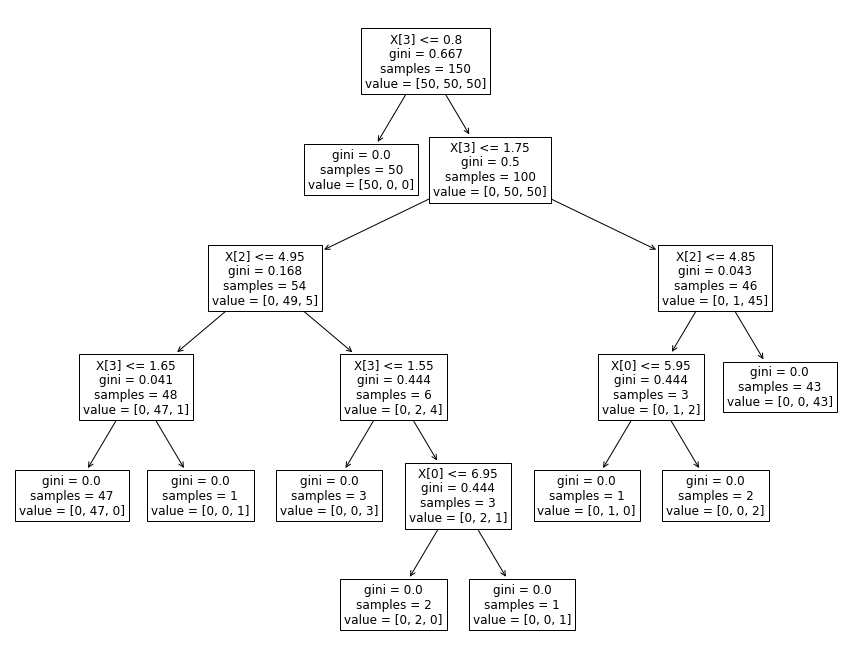

In [9]:
plt.figure(figsize=(15,12))
tree.plot_tree(decision_tree,fontsize=12);

## Train/test split

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size = 0.3,stratify = y,random_state = 100)

In [12]:
clf = tree.DecisionTreeClassifier()
clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [13]:
ypred = clf.predict(X_test)
ypred

array([0, 1, 2, 1, 2, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 2, 2, 2, 1, 1, 2, 1,
       1, 2, 1, 0, 1, 1, 0, 2, 2, 2, 1, 0, 1, 2, 0, 0, 0, 1, 0, 0, 0, 1,
       2])

In [14]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,ypred)

0.9333333333333333

In [15]:
accuracy_score(y_train,clf.predict(X_train))

1.0